## Joseph Farag

# How likely are you to win the Lottery?
The odds of winning the lottery are well known to be virtually impossible, but how many people know the actual odds and can visualize just how unlikely the chances are of winning the ultimate jackpot. The odds of the winning the major prize vary between the number of numbers available and number of winning numbers required to win, which varies in different lottery games across the world. For this project we're focusing on the lottery rules where 6 numbers are required out of a possible 59 choices, which is common in various lotteries, such as one in the UK, which we'll compare it to.

### Methods
The first task required to analyze the probabilities is to define some functions that will be important to analyze the data. These are defined below:

In [121]:
def factorial(n):
    final_product = 1
    for i in range(n, 0, -1): #counting backwards in range
        final_product *= i
    return final_product

In [122]:
def combination(n,k):
    return factorial(n) / (factorial(k)*factorial(n-k))

We first define a factorial function, which is essential to defining our combination function below it, which we'll be using in all our functions to come, to calculate the number of possibilities and outcomes for different scenarios within a game of lottery. Firstly, we calculate the probability of winning the lottery with just 1 combination of 6 numbers out of 59:

In [43]:
def lotto_odds(num):
    outcomes = combination(59,6)
    odds = 1/outcomes
    percent = odds*100
    print("The odds of winning the lotto with numbers {} are {:.7f}%. This is equivalent to a 1 in {:,} chance.".format(num,percent,int(outcomes)))

In [126]:
lotto_odds([6,12,3,46,27,18])

The odds of winning the lotto with numbers [6, 12, 3, 46, 27, 18] are 0.0000022%. This is equivalent to a 1 in 45,057,474 chance.


As you can see with our first function, the odds of picking a winning combination of 6 out of 59 numbers with only 1 choice is virtually 0%. From this we can see the practical odds of winning the lottery are very slim. We test below the probabilities of winning with multiple combinations.

In [127]:
def multiple_numbers(num):
    outcomes = combination(59,6)
    odds = num/outcomes
    percent = odds*100
    odds2 = round(outcomes/num)
    print("The odds of winning the lotto with {} different tickets are {:.7f}%. This is equivalent to approximately a 1 in {:,} chance.".format(num,percent,odds2))

In [151]:
print(multiple_numbers(5), multiple_numbers(10), multiple_numbers(30), multiple_numbers(100))

The odds of winning the lotto with 5 different tickets are 0.0000111%. This is equivalent to approximately a 1 in 9,011,495 chance.
The odds of winning the lotto with 10 different tickets are 0.0000222%. This is equivalent to approximately a 1 in 4,505,747 chance.
The odds of winning the lotto with 30 different tickets are 0.0000666%. This is equivalent to approximately a 1 in 1,501,916 chance.
The odds of winning the lotto with 100 different tickets are 0.0002219%. This is equivalent to approximately a 1 in 450,575 chance.
None None None None


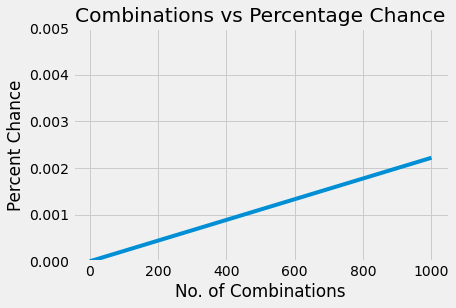

In [150]:
import matplotlib.pyplot as plt
import pandas as pd
percentages= []
for i in range(1001):
    outcomes = combination(59,6)
    odds = i/outcomes
    percent = odds*100
    percentages.append(percent)
percent_df = pd.DataFrame(data=[range(1001), percentages])
plt.style.use("fivethirtyeight")
plt.plot(percent_df.loc[0], percent_df.loc[1])
plt.ylim(0,0.005)
plt.xlabel("No. of Combinations")
plt.ylabel("Percent Chance")
plt.title("Combinations vs Percentage Chance")
plt.show()

The functions above prove that the chances of winning the lottery improve with the more combinations and games you play of the lottery. Unfortunately they only improve at a constant rate rather than exponentially as seen on the plot above, and thus even with up to 1000 games, there is much less than a 0.01 chance to win the major prize. This indicates that it doesn't appear to be worth the added costs of spending more for more tickets in the lottery.

Most lotteries have some winning prizes from having at least 2 of the numbers in the combination. The prize isn't anywhere near as high as having every number, but could still make it worthwhile. Below we determine the odds of having at least 2 numbers.

In [152]:
def two_numbers():
    outcomes = combination(59,6)
    
    n_ticket_2 = combination(6,2)
    n_remaining_2 = combination(53,4)
    outcomes_2 = n_ticket_2*n_remaining_2
    
    n_ticket_3 = combination(6,3)
    n_remaining_3 = combination(53,3)
    outcomes_3 = n_ticket_3*n_remaining_3
    
    n_ticket_4 = combination(6,4)
    n_remaining_4 = combination(53,2)
    outcomes_4 = n_ticket_4*n_remaining_4
    
    n_ticket_5 = combination(6,5)
    n_remaining_5 = combination(53,1)
    outcomes_5 = n_ticket_5*n_remaining_5
    
    outcomes_6 = 1
    
    odds = (outcomes_2+outcomes_3+outcomes_4+outcomes_5+outcomes_6)/outcomes #Sum of all outcomes 2 and up is at least 2 numbers
    percent = odds*100
    odds2 = round(outcomes/(outcomes_2+outcomes_3+outcomes_4+outcomes_5+outcomes_6))
    print("The odds of drawing at least 2 numbers are {:.7f}%. This is equivalent to approximately a 1 in {:,} chance.".format(percent, odds2))

In [153]:
two_numbers()

The odds of drawing at least 2 numbers are 10.8347929%. This is equivalent to approximately a 1 in 9 chance.


The odds are obviously higher, but with only a 1 in 9 chance of winning, it's still not a great bet considering the lower prizes from getting less numbers.

### Checking Historical Data
Using a dataset of the UK lottery that shows all the winning combinations in the history of the lottery. We'll analyse the datset to test how frequent combinations have appeared in the past.

In [110]:
import pandas as pd
lotto_uk = pd.read_csv(r"C:\Users\joefa\OneDrive\Documents\Projects\lotto_history.csv")
lotto_uk.head()

,Date,Ball_1,Ball_2,Ball_3,Ball_4,Ball_5,Ball_6,Ball_Bonus
0,2016-01-02,12,25,29,40,48,56,52
1,2016-01-06,8,30,40,50,54,57,13
2,2016-01-09,26,27,46,47,52,58,48
3,2016-01-13,4,12,38,46,57,59,8
4,2016-01-16,1,8,12,25,43,52,38


In [117]:
def extract_values(row):
    row = row[1:7]
    row = set(row.values)
    return row

success_numbers = lotto_uk.apply(extract_values, axis=1)
success_numbers.head()

0    {40, 12, 48, 56, 25, 29}
1     {8, 40, 50, 54, 57, 30}
2    {58, 46, 47, 52, 26, 27}
3     {4, 38, 12, 46, 57, 59}
4      {1, 8, 43, 12, 52, 25}
dtype: object

In [118]:
def check_occurrence(user_numbers, historic_numbers):
    user_numbers = set(user_numbers)
    check_occurrence = user_numbers == historic_numbers
    n_occurrence = check_occurrence.sum()
    
    if n_occurrence == 0:
        print("The combination {} has never occurred.".format(user_numbers))
        
    else:
        print("The combination {} occurred {} times.".format(user_numbers, n_occurrence))

In [120]:
check_occurrence([40,12,48,56,25,29], success_numbers)

The combination {40, 12, 48, 56, 25, 29} occurred 1 times.


In [154]:
check_occurrence([44,11,8,16,5,19], success_numbers)

The combination {5, 8, 11, 44, 16, 19} has never occurred.


In [155]:
check_occurrence([1,10,4,36,45,39], success_numbers)

The combination {1, 4, 36, 39, 10, 45} has never occurred.


In [156]:
check_occurrence([1, 8, 43, 12, 52, 25], success_numbers)

The combination {1, 8, 43, 12, 52, 25} occurred 1 times.


We can see above, just how rare it is for any 1 of these combinations appear in the historical dataset, confirming the low odds of winning with any combination that we calculated above.

### Conclusions
In conclusion, it is clear that the odds of winning the lottery are very minimal. These functions and subsequent results can be useful in various situations, such as advertisements and apps that are aimed at helping with gambling addictions.